In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

iteration 0: loss 1.999972
iteration 100: loss 1.993949
iteration 200: loss 1.962436
iteration 300: loss 1.766190
iteration 400: loss 1.316872
iteration 500: loss 1.104620
training accuracy: 0.53


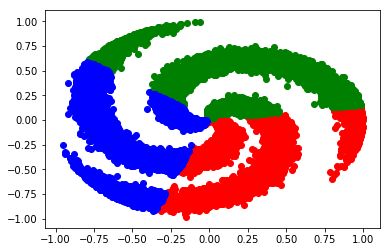

test accuracy: 0.52


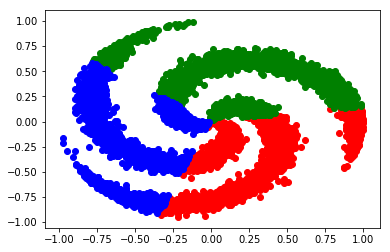

Training Error Plot


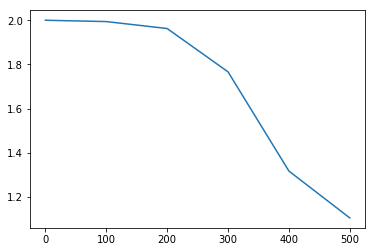

In [2]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer = sigmoid(np.dot(train_X, W) + b) # sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*sigmoid(hidden_layer)*(1-sigmoid(hidden_layer))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = sigmoid(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = sigmoid(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 2.003875
iteration 10: loss 2.000818
iteration 20: loss 1.997783
iteration 30: loss 1.994749
iteration 40: loss 1.991694
iteration 50: loss 1.988599
iteration 60: loss 1.985440
iteration 70: loss 1.982195
iteration 80: loss 1.978839
iteration 90: loss 1.975347
iteration 100: loss 1.973003
iteration 110: loss 1.969167
iteration 120: loss 1.965108
iteration 130: loss 1.961290
iteration 140: loss 1.957605
iteration 150: loss 1.952658
iteration 160: loss 1.947781
iteration 170: loss 1.942306
iteration 180: loss 1.936390
iteration 190: loss 1.929946
iteration 200: loss 1.922883
iteration 210: loss 1.915025
iteration 220: loss 1.906429
iteration 230: loss 1.896432
iteration 240: loss 1.885455
iteration 250: loss 1.872797
iteration 260: loss 1.858563
iteration 270: loss 1.842151
iteration 280: loss 1.823335
iteration 290: loss 1.801552
iteration 300: loss 1.776177
iteration 310: loss 1.746417
iteration 320: loss 1.711253
iteration 330: loss 1.669380
iteration 340: loss 1.619

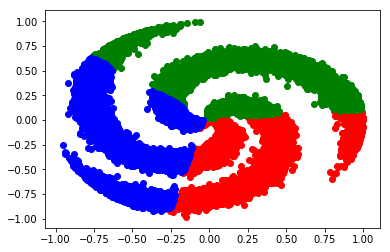

test accuracy: 0.53


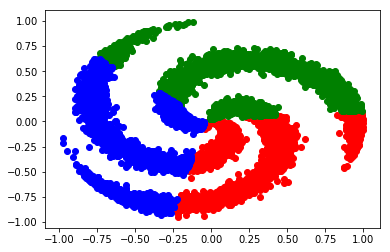

Training Error Plot


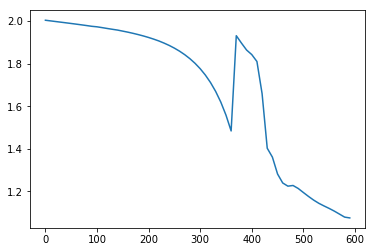

In [4]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer1 = sigmoid(np.dot(train_X, W) + b)
    hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*sigmoid(hidden_layer2)*(1-sigmoid(hidden_layer2))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*sigmoid(hidden_layer1)*(1-sigmoid(hidden_layer1))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = sigmoid(np.dot(train_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = sigmoid(np.dot(test_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

In [6]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 0.999983
iteration 10: loss 0.999772
iteration 20: loss 0.999554
iteration 30: loss 0.999319
iteration 40: loss 0.999060
iteration 50: loss 0.998767
iteration 60: loss 0.998428
iteration 70: loss 0.998033
iteration 80: loss 0.997566
iteration 90: loss 0.997010
iteration 100: loss 0.996345
iteration 110: loss 0.995546
iteration 120: loss 0.994585
iteration 130: loss 0.993425
iteration 140: loss 0.992026
iteration 150: loss 0.990335
iteration 160: loss 0.988290
iteration 170: loss 0.985818
iteration 180: loss 0.982827
iteration 190: loss 0.979208
iteration 200: loss 0.974829
iteration 210: loss 0.969531
iteration 220: loss 0.963279
iteration 230: loss 0.955845
iteration 240: loss 0.946909
iteration 250: loss 0.936141
iteration 260: loss 0.923202
iteration 270: loss 0.907588
iteration 280: loss 0.888785
iteration 290: loss 0.866139
iteration 300: loss 0.838863
iteration 310: loss 0.806017
iteration 320: loss 0.766465
iteration 330: loss 0.718855
iteration 340: loss 0.661

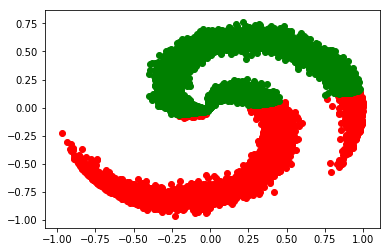

test accuracy: 0.77


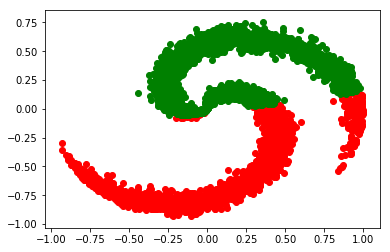

Training Error Plot


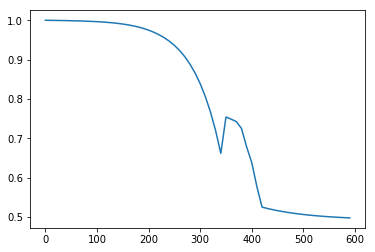

In [7]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(600):
  
    #Forward
    hidden_layer = sigmoid(np.dot(train_X, W) + b) # sigmoid activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the sigmoid non-linearity
    dhidden = dhidden*sigmoid(hidden_layer)*(1-sigmoid(hidden_layer))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = sigmoid(np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = sigmoid(np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 0.999447
iteration 100: loss 0.984516
iteration 200: loss 0.955440
iteration 300: loss 0.863245
iteration 400: loss 1.029653
iteration 500: loss 0.516521
iteration 600: loss 0.500777
iteration 700: loss 0.494539
iteration 800: loss 0.491850
iteration 900: loss 0.490796
training accuracy: 0.77


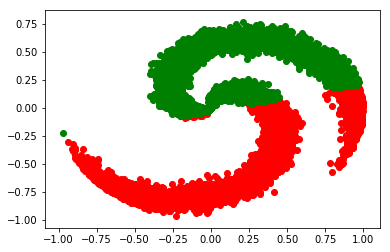

test accuracy: 0.78


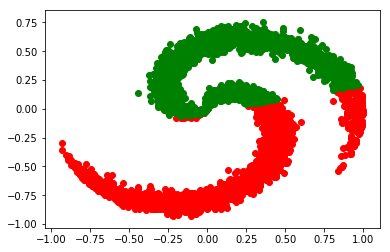

Training Error Plot


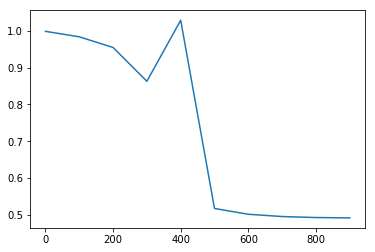

In [9]:
def sigmoid(x):
    ans = 1+np.exp(-1*x)
    return(1/ans)
    
#gradient of sigmoid is f(x)(1-f(x))

# initialize parameters randomly
D=2
K=2
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = sigmoid(np.dot(train_X, W) + b) # sigmoid activation
    hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) # sigmoid activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the sigmoid non-linearity
    dhidden2 = dhidden2*sigmoid(hidden_layer2)*(1-sigmoid(hidden_layer2))
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the sigmoid non-linearity
    dhidden1 = dhidden1*sigmoid(hidden_layer1)*(1-sigmoid(hidden_layer1))
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = sigmoid(np.dot(train_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = sigmoid(np.dot(test_X, W) + b) 
hidden_layer2 = sigmoid(np.dot(hidden_layer1, W2) + b2) 
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()